### import packages

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")
import seaborn as sn
import numpy as np
import scipy.stats as stats
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR,NuSVR,LinearSVR
from sklearn.linear_model import LinearRegression,Ridge,RidgeCV,BayesianRidge,SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.svm import NuSVR
from sklearn.impute import KNNImputer
from sklearn.cluster import KMeans
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor,XGBRFRegressor
from mlxtend.regressor import StackingCVRegressor
import random
import dask.dataframe as dd
from dask.distributed import Client
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
import joblib

### import dataset 

In [9]:
df=pd.read_csv('avocado.csv')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


### Date - The date of the observation
### AveragePrice - the average price of a single avocado --- output column --- indepedent variable
### type - conventional or organic
### year - the year
### Region - the city or region of the observation
### Total Volume - Total number of avocados sold
### 4046 - Total number of avocados with PLU 4046 sold
### 4225 - Total number of avocados with PLU 4225 sold
### 4770 - Total number of avocados with PLU 4770 sold

### drop column unnamed

In [10]:
df=df.drop(['Unnamed: 0'],axis=1)
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [11]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [12]:
print('Number of rows x columns in dataset are:',df.shape)

Number of rows x columns in dataset are: (18249, 13)


In [13]:
print('Dataset contains any null values:',df.isnull().values.any())

Dataset contains any null values: False


In [14]:
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

### Columns such as Date,type,region are type object(string). 
### year is of int type. rest all are float

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


### using info func we gained insight on the dtype of columns
### now use describe func and analyze dataset

In [16]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


### conv all categorical data into numerical

### conv date column datapoint to month datapoint

In [17]:
for i in range(len(df.Date)):
    df.Date[i]=int(df.Date[i][5:7])
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,12,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,12,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,12,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,11,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,1,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,1,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,1,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


### conv 20XX year datapoint to XX

In [18]:
for i in range(len(df.year)):
    df.year[i]=int(df.year[i]-2000)
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,12,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,15,Albany
1,12,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,15,Albany
2,12,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,15,Albany
3,12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,15,Albany
4,11,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,15,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,18,WestTexNewMexico
18245,1,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,18,WestTexNewMexico
18246,1,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,18,WestTexNewMexico
18247,1,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,18,WestTexNewMexico


### conv all categorical data into numerical

In [19]:
dicty={}
for i in df[['type']]:
    dicto={}
    for j in range(len(df[i].unique())):
        dicto[df[i].unique()[j]]=j
    dicty[i]=dicto
dicty

{'type': {'conventional': 0, 'organic': 1}}

In [20]:
for i in ['type']:
    df[i]=df[i].apply(lambda x:dicty[i][x])
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,12,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,15,Albany
1,12,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,15,Albany
2,12,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,15,Albany
3,12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,15,Albany
4,11,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,15,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,18,WestTexNewMexico
18245,1,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,18,WestTexNewMexico
18246,1,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,18,WestTexNewMexico
18247,1,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,18,WestTexNewMexico


In [21]:
dicty={}
for i in df[['region']]:
    dicto={}
    for j in range(len(df[i].unique())):
        dicto[df[i].unique()[j]]=j
    dicty[i]=dicto
dicty

{'region': {'Albany': 0,
  'Atlanta': 1,
  'BaltimoreWashington': 2,
  'Boise': 3,
  'Boston': 4,
  'BuffaloRochester': 5,
  'California': 6,
  'Charlotte': 7,
  'Chicago': 8,
  'CincinnatiDayton': 9,
  'Columbus': 10,
  'DallasFtWorth': 11,
  'Denver': 12,
  'Detroit': 13,
  'GrandRapids': 14,
  'GreatLakes': 15,
  'HarrisburgScranton': 16,
  'HartfordSpringfield': 17,
  'Houston': 18,
  'Indianapolis': 19,
  'Jacksonville': 20,
  'LasVegas': 21,
  'LosAngeles': 22,
  'Louisville': 23,
  'MiamiFtLauderdale': 24,
  'Midsouth': 25,
  'Nashville': 26,
  'NewOrleansMobile': 27,
  'NewYork': 28,
  'Northeast': 29,
  'NorthernNewEngland': 30,
  'Orlando': 31,
  'Philadelphia': 32,
  'PhoenixTucson': 33,
  'Pittsburgh': 34,
  'Plains': 35,
  'Portland': 36,
  'RaleighGreensboro': 37,
  'RichmondNorfolk': 38,
  'Roanoke': 39,
  'Sacramento': 40,
  'SanDiego': 41,
  'SanFrancisco': 42,
  'Seattle': 43,
  'SouthCarolina': 44,
  'SouthCentral': 45,
  'Southeast': 46,
  'Spokane': 47,
  'StLouis'

In [23]:
for i in ['region']:
    df[i]=df[i].apply(lambda x:dicty[i][x])
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,12,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,15,0
1,12,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,15,0
2,12,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,15,0
3,12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,15,0
4,11,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,18,53
18245,1,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,18,53
18246,1,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,18,53
18247,1,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,18,53


### conv date column datatype to int

In [24]:
df = df.astype({'Date': np.int})

### now use describe func and analyze dataset

In [25]:
df.describe()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000
mean,6.177215,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,0.499918,16.147899,26.495644
std,3.534130,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.500014,0.939938,15.583788
min,1.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,15.000000,0.000000
25%,3.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,0.000000,15.000000,13.000000
50%,6.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,0.000000,16.000000,26.000000
75%,9.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,1.000000,17.000000,40.000000
max,12.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,1.000000,18.000000,53.000000


### start analyzing to find correlation and the columns to drop

In [26]:
df.corr()['AveragePrice']

Date            0.162409
AveragePrice    1.000000
Total Volume   -0.192752
4046           -0.208317
4225           -0.172928
4770           -0.179446
Total Bags     -0.177088
Small Bags     -0.174730
Large Bags     -0.172940
XLarge Bags    -0.117592
type            0.615845
year            0.093197
region         -0.011716
Name: AveragePrice, dtype: float64

### use heatmap to check correlation on dataset

<AxesSubplot:>

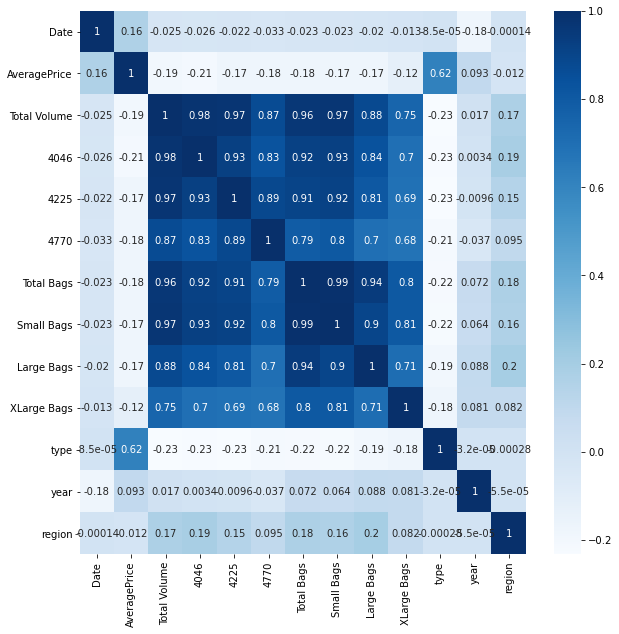

In [27]:
plt.figure(figsize=[10,10])
sn.heatmap(df.corr(),annot=True,cmap='Blues')

### check the graphical relation between AveragePrice column and rest

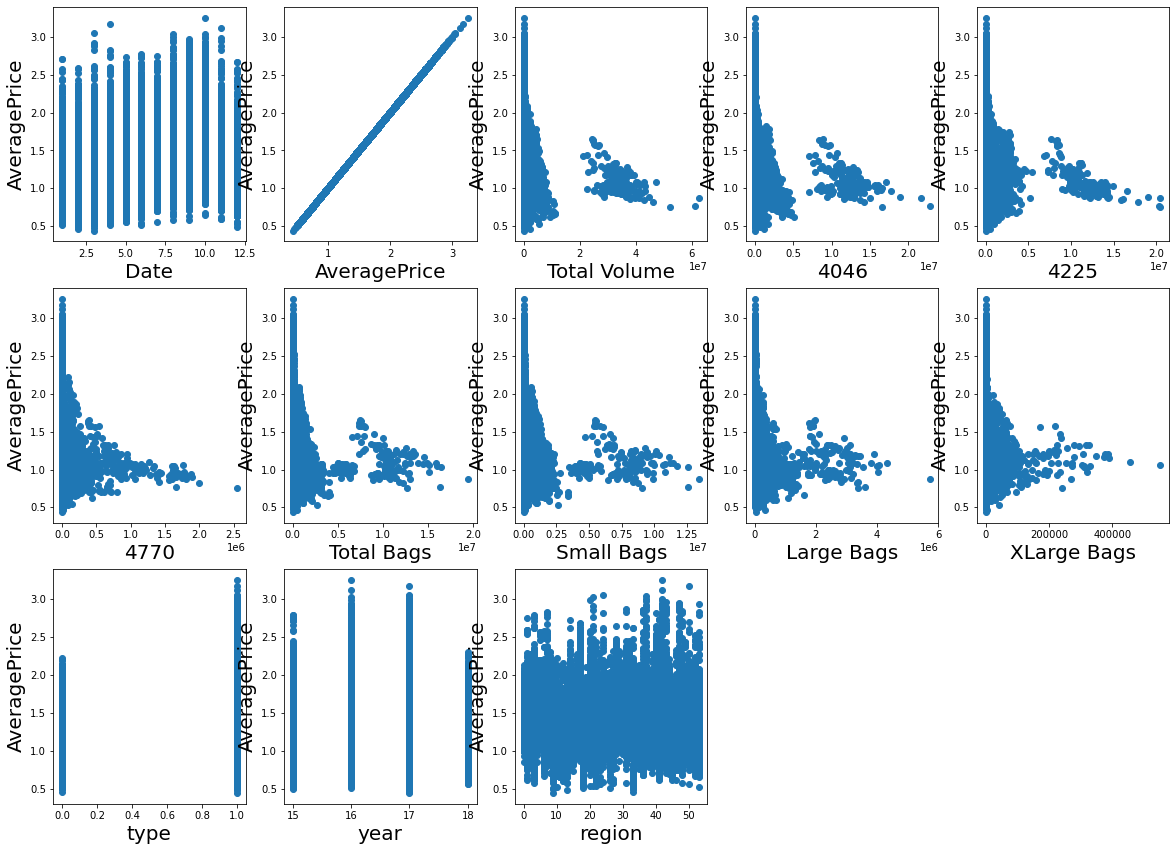

In [28]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for i in df.columns:
    if plotnumber<=len(df.columns):
        ax=plt.subplot(5,5,plotnumber)
        plt.scatter(df[i],df['AveragePrice'])
        plt.xlabel(i,fontsize=20)
        plt.ylabel('AveragePrice',fontsize=20)
    plotnumber+=1
plt.show()

### even tho the correlation is very low but using logical reasoning we can say that month(date) is important to check proper season. Avocado quality can differ acc to regions season hence it is also imp. acc to year the amount of avocados produced can change hence their price. type is highly correlated. rest all columns signify the quantity of avocado if quantity is lower in any circumstance price def goes up hence these columns are also imp.

### check dist plots of dataset

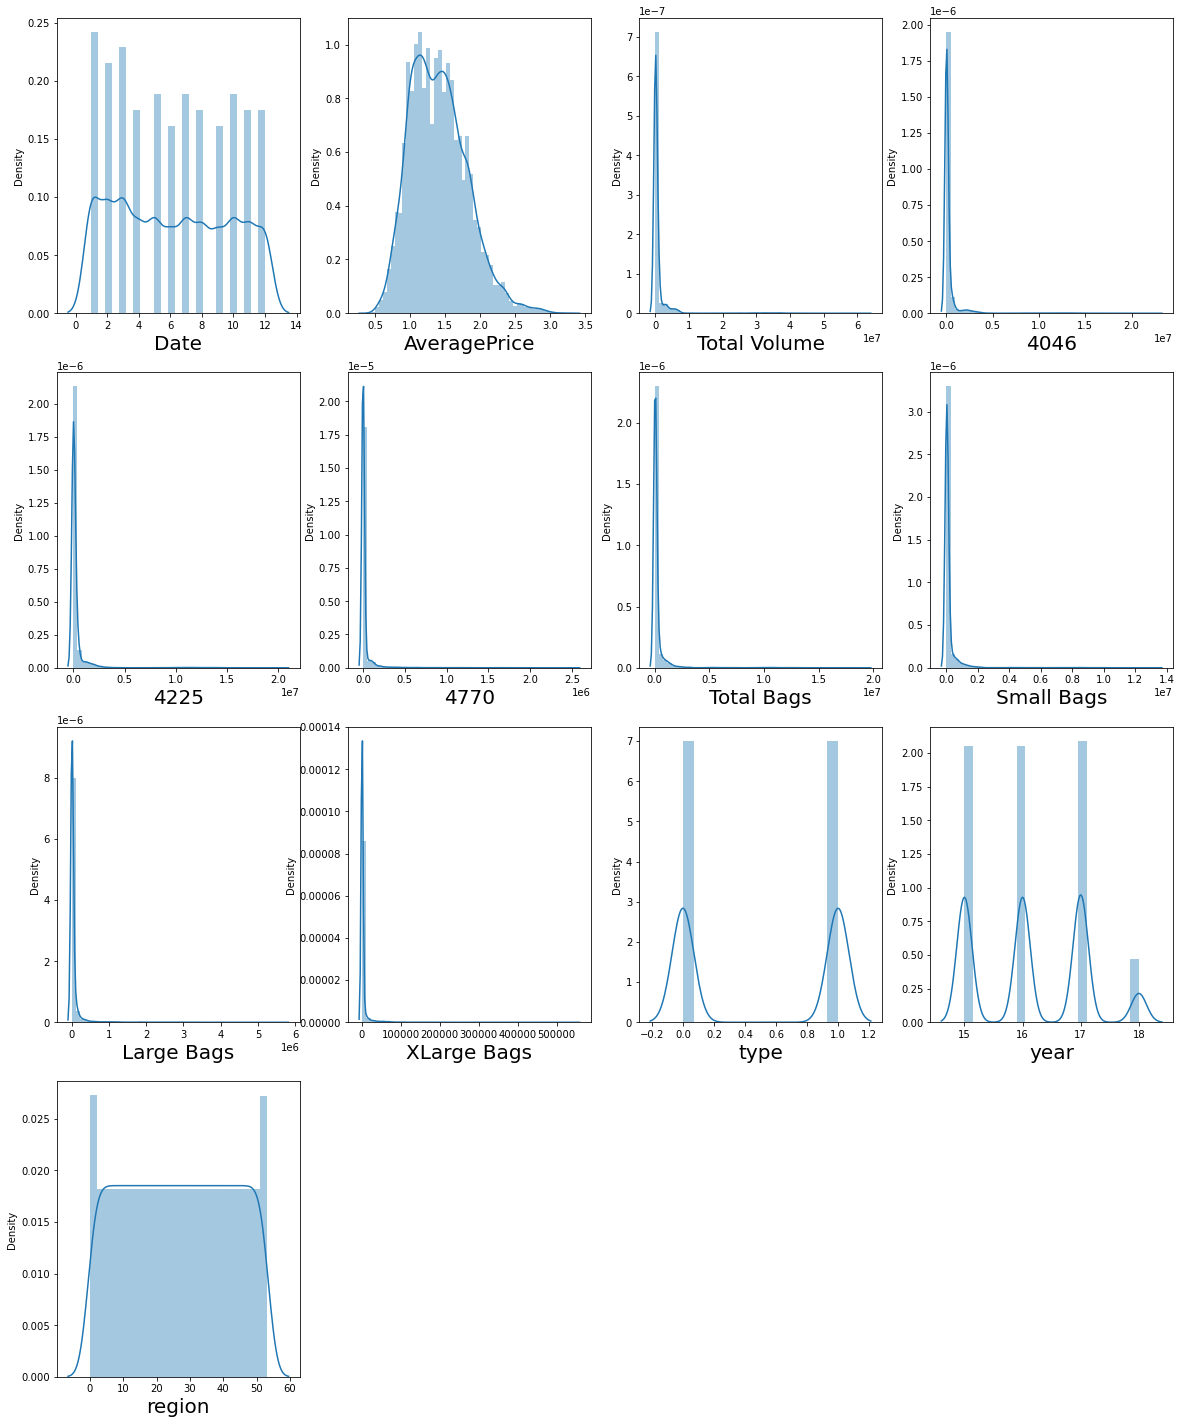

In [29]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in df.columns:
    if plotnumber<=len(df.columns):
        ax=plt.subplot(4,4,plotnumber)
        sn.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

### region & date(month) column has rectangular distribution plot.
### type & year has bimodial distribution plot
### Rest all normal distribution plot. out of which all independent variables are positively skewed

### check for outliers

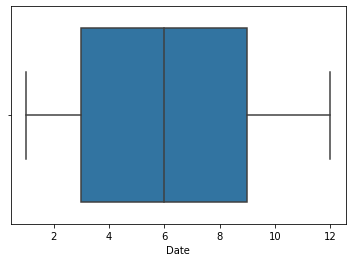

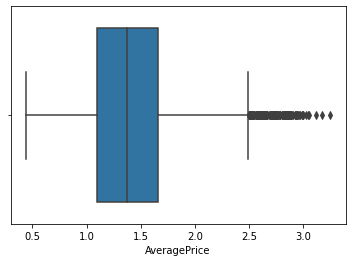

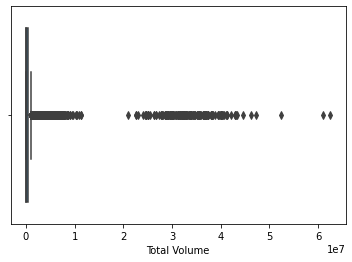

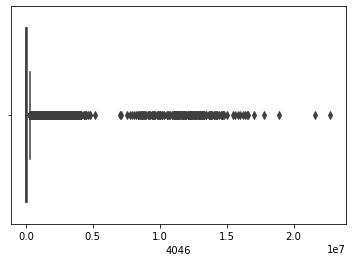

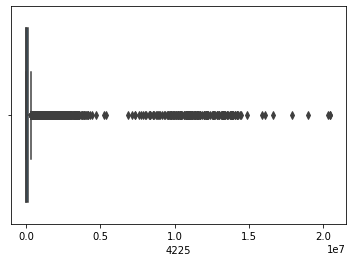

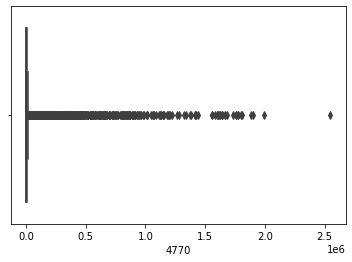

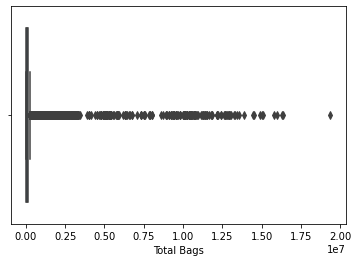

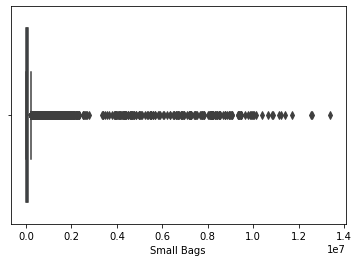

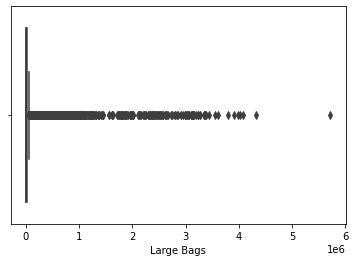

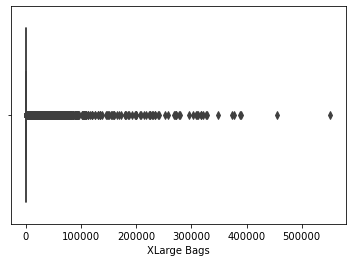

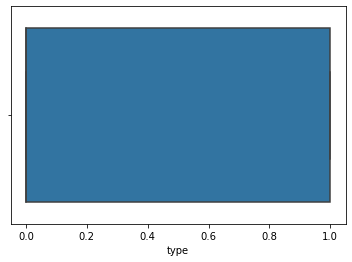

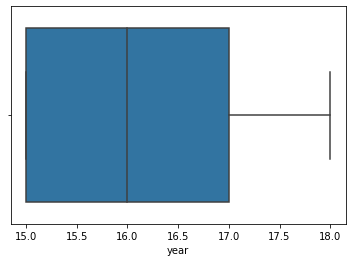

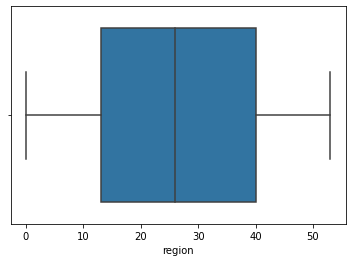

In [30]:
for i in df.columns:
    sn.boxplot(df[i])
    plt.show()

### All the non categorical type have valid outliers as they are Natural Variation, hence no need to remove outliers.
### if it was incorrect data entry then outliers were needed to removed

In [50]:
y = df[['AveragePrice']].values
x = df.drop(columns = ['AveragePrice'])

### check for bias and remove if possible

In [51]:
print(x.skew())

Date             0.106617
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
region           0.000030
dtype: float64


In [52]:
print(len(x.skew().loc[x.skew()>0.55]))

8


In [53]:
for index in x.skew().index:
    if x.skew().loc[index] >0.55:
        x[index]=np.cbrt(x[index])

In [54]:
#lets again check the skewness
print(x.skew())
print()
print(len(x.skew().loc[x.skew()>0.55]))# Number of features having skewness more than 0.55 

Date            0.106617
Total Volume    2.236143
4046            2.277861
4225            2.130378
4770            2.316048
Total Bags      2.302176
Small Bags      2.217682
Large Bags      2.186514
XLarge Bags     2.842255
type            0.000329
year            0.215339
region          0.000030
dtype: float64

8


### lets do feature scaling on non categorical values only

In [36]:
scaler = StandardScaler()
x[['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']] = scaler.fit_transform(x[['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']])
x

,Date,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,12,-0.373714,-0.659077,-0.034740,-0.516446,-0.598284,-0.499147,-0.726623,-0.497449,0,15,0
1,12,-0.416209,-0.695853,-0.104144,-0.502067,-0.578275,-0.477634,-0.723402,-0.497449,0,15,0
2,12,-0.186355,-0.682425,0.247649,-0.430509,-0.612653,-0.514969,-0.719251,-0.497449,0,15,0
3,12,-0.314419,-0.650891,0.070758,-0.484502,-0.681931,-0.591191,-0.699057,-0.497449,0,15,0
4,11,-0.435033,-0.667781,-0.110236,-0.480881,-0.669753,-0.580158,-0.665220,-0.497449,0,15,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2,-0.670393,-0.589007,-0.788271,-0.734478,-0.493306,-0.392824,-0.582767,-0.497449,1,18,53
18245,1,-0.705946,-0.645993,-0.686526,-0.734478,-0.584109,-0.489994,-0.615341,-0.497449,1,18,53
18246,1,-0.707402,-0.645975,-0.732143,-0.195392,-0.580964,-0.479098,-0.776582,-0.497449,1,18,53
18247,1,-0.679622,-0.621105,-0.706268,-0.195622,-0.544766,-0.440319,-0.767092,-0.497449,1,18,53


### check multicollinearity

In [37]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1]) ]
vif["Features"] = x.columns
vif

,vif,Features
0,3.902691,Date
1,313.479707,Total Volume
2,36.722968,4046
3,58.939909,4225
4,4.465365,4770
5,182.684428,Total Bags
6,97.029816,Small Bags
7,12.821669,Large Bags
8,2.636285,XLarge Bags
9,3.618126,type


### Multicollinearity only affects the coefficients and p-values, but it does not influence the model’s ability to predict the dependent variable.
### levels of multicollinearity does it signify.
### VIF ~ 1: Negligible
### 1<VIF<5 : Moderate
### VIF>5 : Extreme
### no need to drop columns as we will use pca in further steps and remove the unwanted dimensions

In [38]:
for i in range(2,12):
    pca = PCA(n_components=i)
    principalComponents = pca.fit_transform(x)
    print(i,sum(pca.explained_variance_ratio_))

2 0.96633022213456
3 0.9915762991675832
4 0.9950983672541102
5 0.9967634740647244
6 0.9978383319183839
7 0.9985465002405571
8 0.9991543376364852
9 0.9996709273285339
10 0.9999754734982425
11 0.9999915318139239


### Any n_component with more than 95% data retention is good. I will use pca of n_component 4 as n_component value 2 & 3 are very less dimensions, leading to lower acc

In [39]:
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(x)

### algo to find best train test random split

In [2]:
def besttrain(model,x,y):
    random=0
    score=0
    for i in range(42,120):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state = i,test_size=0.20,shuffle=True)
        model.fit(x_train,y_train)
        tmp=r2_score(y_test,model.predict(x_test))
        if tmp>score:
            score=tmp
            random=i
    return random

### All models we are going to use to iterate and find the best model

In [3]:
models=[GradientBoostingRegressor(),NuSVR(),LinearRegression(),Ridge(),RidgeCV(),BayesianRidge(),SGDRegressor(),SVR(),
        AdaBoostRegressor(),LinearSVR(),KNeighborsRegressor(),RandomForestRegressor(),BaggingRegressor(),
       DecisionTreeRegressor(),LGBMRegressor(), XGBRFRegressor(),XGBRegressor()]

### instead of finding the best models using whole dataset which will be very computational heavy and would take alot of time to find best hyperparameters, it will be better to take 10% randomly sampled dataset. using this randomly sampled dataset build and find best model and then its best hyperparameters. and then build that model on the whole dataset 

### randomly sample dataset to 10%
### preprocess the dataset same as above all steps
### find the best models

In [4]:
filename = "avocado.csv" 
n = sum(1 for line in open(filename))-1  # Calculate number of rows in file
s = n//10  # sample size of 10%
skip = sorted(random.sample(range(1, n+1), n-s))  # n+1 to compensate for header 
df = pd.read_csv(filename, skiprows=skip)
df=df.drop(['Unnamed: 0'],axis=1)
for i in range(len(df.Date)):
    df.Date[i]=int(df.Date[i][5:7])
for i in range(len(df.year)):
    df.year[i]=int(df.year[i]-2000)
dicty={}
for i in df[['type']]:
    dicto={}
    for j in range(len(df[i].unique())):
        dicto[df[i].unique()[j]]=j
    dicty[i]=dicto
for i in ['type']:
    df[i]=df[i].apply(lambda x:dicty[i][x])
dicty={}
for i in df[['region']]:
    dicto={}
    for j in range(len(df[i].unique())):
        dicto[df[i].unique()[j]]=j
    dicty[i]=dicto
for i in ['region']:
    df[i]=df[i].apply(lambda x:dicty[i][x])
df = df.astype({'Date': np.int})
y = df[['AveragePrice']].values
x = df.drop(columns = ['AveragePrice'])
for index in x.skew().index:
    if x.skew().loc[index] >0.55:
        x[index]=np.cbrt(x[index])
scaler = StandardScaler()
x[['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']] = scaler.fit_transform(x[['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']])
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(x)
for i in models:
    x_train,x_test,y_train,y_test=train_test_split(principalComponents,y,random_state = 42,test_size=0.20)
    scores=cross_val_score(i,x_train,y_train,cv=5,scoring='r2')
    score=np.mean(scores)
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    if r2_score(y_test,y_pred)>score:
        diff=r2_score(y_test,y_pred)-score
    else:
        diff=score-r2_score(y_test,y_pred)
    print('*'*10)
    print(i)
    print('score',score)
    print('r2',r2_score(y_test,y_pred))
    print('diff',diff)
    print('mae',mean_absolute_error(y_test, y_pred))
    print('rmse',np.sqrt(mean_squared_error(y_test, y_pred)))

**********
GradientBoostingRegressor()
score 0.6731933956535416
r2 0.6068983856106807
diff 0.06629501004286098
mae 0.19140864778257458
rmse 0.24612026679265825
**********
NuSVR()
score 0.46190369070717674
r2 0.42331952617715307
diff 0.03858416453002367
mae 0.23493354879336
rmse 0.29810041923487374
**********
LinearRegression()
score 0.28640377333392725
r2 0.2510409574960123
diff 0.03536281583791495
mae 0.2666502382893921
rmse 0.33972225469341943
**********
Ridge()
score 0.28640566856948324
r2 0.25106271692848614
diff 0.0353429516409971
mae 0.26664835896794
rmse 0.3397173196991587
**********
RidgeCV(alphas=array([ 0.1,  1. , 10. ]))
score 0.2864198969599101
r2 0.25125559201487424
diff 0.03516430494503586
mae 0.2666356410695365
rmse 0.33967357289420474
**********
BayesianRidge()
score 0.28640023744913884
r2 0.25190308010472773
diff 0.03449715734441111
mae 0.26660782590511006
rmse 0.3395266721901359
**********
SGDRegressor()
score 0.23290443208610762
r2 0.25980055018724535
diff 0.02689611

### from above can see that models XGBRegressor,LGBMRegressor & RandomForestRegressor are best models with highest acc and do not much over or underfitting problem

### Finetune those models

In [6]:
parameters={'n_estimators': [100, 80, 60, 55, 51, 45],  
              'max_depth': [7, 8],
              'reg_lambda' :[0.26, 0.25, 0.2]}
clf = RandomizedSearchCV(XGBRegressor(), parameters, cv=5,scoring="r2")
clf.fit(principalComponents,y)
clf.best_params_

{'reg_lambda': 0.26, 'n_estimators': 80, 'max_depth': 7}

In [7]:
parameters={'num_leaves': sp_randint(6, 50), 
             'min_child_samples': sp_randint(100, 500), 
             'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
             'subsample': sp_uniform(loc=0.2, scale=0.8), 
             'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
             'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
             'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}
clf = RandomizedSearchCV(LGBMRegressor(), parameters, cv=5,scoring="r2")
clf.fit(principalComponents,y)
clf.best_params_

{'colsample_bytree': 0.7891315648076571,
 'min_child_samples': 202,
 'min_child_weight': 1,
 'num_leaves': 40,
 'reg_alpha': 2,
 'reg_lambda': 1,
 'subsample': 0.6863980390805567}

In [8]:
parameters={"n_estimators":[10,100,500],'criterion':['mse', 'mae'],'max_features':['auto', 'sqrt', 'log2']}
clf = RandomizedSearchCV(RandomForestRegressor(), parameters, cv=5,scoring="r2")
clf.fit(principalComponents,y)
clf.best_params_

{'n_estimators': 500, 'max_features': 'auto', 'criterion': 'mse'}

### find the best train test random split for model

In [40]:
besttrain(LGBMRegressor(),principalComponents,y)

94

### best random state is 94
### now use whole dataset, re run the whole dataset preprocess steps and use whole dataset to build model
### Stack all the best models to improve accuracy
### use the best random state obtained
### use the hyperparameters obtained

In [41]:
X_train, X_test, y_train, y_test = train_test_split(principalComponents, y, random_state=94, test_size=0.2)
stack = StackingCVRegressor(regressors=(LGBMRegressor(colsample_bytree=0.7891315648076571,min_child_samples=202,
 min_child_weight=1,num_leaves= 40,reg_alpha=2,reg_lambda=1,subsample=0.6863980390805567), 
                                        RandomForestRegressor(criterion='mse',max_features='auto',n_estimators=500),
                                        XGBRegressor(max_depth=7,n_estimators=80,reg_lambda=0.26)
                                       ),
                            meta_regressor=LGBMRegressor(colsample_bytree=0.7891315648076571,min_child_samples=202,
 min_child_weight=1,num_leaves= 40,reg_alpha=2,reg_lambda=1,subsample=0.6863980390805567), 
                            cv=12,
                            use_features_in_secondary=True,
                            store_train_meta_features=True,
                            shuffle=False)
stack.fit(X_train, y_train)
pred = stack.predict(X_test)
score = r2_score(y_test, pred)
print('r2 score test',score)
pred = stack.predict(X_train)
score = r2_score(y_train, pred)
print('r2 score train',score)

r2 score test 0.9157688331249902
r2 score train 0.9739426087809768


### from above we can observe the acc of model and we can conclude that this model doesnot have any overfitting or underfitting issue

### get all the metrics of the currently trained model.

In [42]:
y_pred=stack.predict(X_test)
score=r2_score(y_test,y_pred)
print('coeff of determination is:',score)
print('mean absolute error:',mean_absolute_error(y_test,y_pred))
print('mean squared error:',mean_squared_error(y_test,y_pred))
print('root mean square error:',np.sqrt(mean_squared_error(y_test,y_pred)))
scores =cross_val_score(StackingCVRegressor(regressors=(LGBMRegressor(colsample_bytree=0.7891315648076571,min_child_samples=202,
 min_child_weight=1,num_leaves= 40,reg_alpha=2,reg_lambda=1,subsample=0.6863980390805567), 
                                        RandomForestRegressor(criterion='mse',max_features='auto',n_estimators=500),
                                        XGBRegressor(max_depth=7,n_estimators=80,reg_lambda=0.26)
                                       ),
                            meta_regressor=LGBMRegressor(colsample_bytree=0.7891315648076571,min_child_samples=202,
 min_child_weight=1,num_leaves= 40,reg_alpha=2,reg_lambda=1,subsample=0.6863980390805567), 
                            cv=12,
                            use_features_in_secondary=True,
                            store_train_meta_features=True,
                            shuffle=False),principalComponents,y,cv=5)
print('cross val score',scores.mean())
print('std err',scores.std())

coeff of determination is: 0.9157688331249902
mean absolute error: 0.08373327119381126
mean squared error: 0.013696520528804915
root mean square error: 0.11703213459902762
cross val score 0.291619397159388
std err 0.22752729902110055


### put AveragePrice column and predicted AveragePrice column side by side to observe the diff between these two columns

In [43]:
y_pred=stack.predict(principalComponents)
data=x
data['AveragePricePred']=y_pred
data['AveragePrice']=y
data['differnce']=data['AveragePrice']-data['AveragePricePred']
data

,Date,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,AveragePricePred,AveragePrice,differnce
0,12,-0.373714,-0.659077,-0.034740,-0.516446,-0.598284,-0.499147,-0.726623,-0.497449,0,15,0,1.242770,1.33,0.087230
1,12,-0.416209,-0.695853,-0.104144,-0.502067,-0.578275,-0.477634,-0.723402,-0.497449,0,15,0,1.281700,1.35,0.068300
2,12,-0.186355,-0.682425,0.247649,-0.430509,-0.612653,-0.514969,-0.719251,-0.497449,0,15,0,0.981821,0.93,-0.051821
3,12,-0.314419,-0.650891,0.070758,-0.484502,-0.681931,-0.591191,-0.699057,-0.497449,0,15,0,1.094620,1.08,-0.014620
4,11,-0.435033,-0.667781,-0.110236,-0.480881,-0.669753,-0.580158,-0.665220,-0.497449,0,15,0,1.254386,1.28,0.025614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2,-0.670393,-0.589007,-0.788271,-0.734478,-0.493306,-0.392824,-0.582767,-0.497449,1,18,53,1.634357,1.63,-0.004357
18245,1,-0.705946,-0.645993,-0.686526,-0.734478,-0.584109,-0.489994,-0.615341,-0.497449,1,18,53,1.698332,1.71,0.011668
18246,1,-0.707402,-0.645975,-0.732143,-0.195392,-0.580964,-0.479098,-0.776582,-0.497449,1,18,53,1.799546,1.87,0.070454
18247,1,-0.679622,-0.621105,-0.706268,-0.195622,-0.544766,-0.440319,-0.767092,-0.497449,1,18,53,1.798322,1.93,0.131678


### observing the above dataframe we can see that there is only slight difference between actual and predicted values
### plot graph to check actual vs pred value

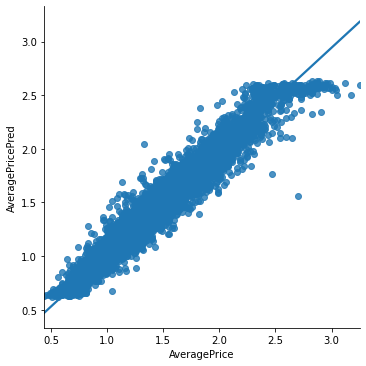

In [44]:
sn.lmplot(x='AveragePrice',y='AveragePricePred',data=data,palette='rainbow')

### plot appropriate graph to check how similar are y_test and y_pred values

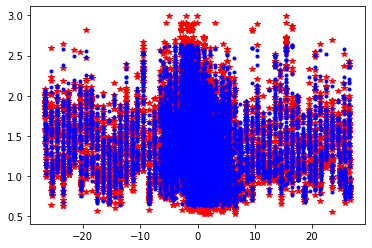

In [45]:
plt.plot(X_test,y_test,'r*')
plt.plot(X_test,stack.predict(X_test),'b.')
plt.show()

### analyze how similar dist plot are of actual and predicted values

<AxesSubplot:xlabel='AveragePricePred', ylabel='Density'>

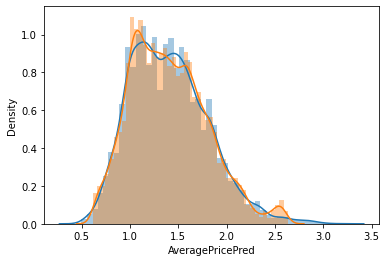

In [47]:
sn.distplot(data['AveragePrice'])
sn.distplot(data['AveragePricePred'])

### Model has accuracy around 97% to 91%. Model is a combination of RandomForestRegressor, XGBRegressor and LGBMRegressor
### Save model

In [48]:
joblib.dump(stack,'Avocado.pkl')

['Avocado.pkl']